## importing libraries

In [1]:
# basic numpy & pandas library
import pandas as pd
import numpy as np

# visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# warning library to ignore warning
import warnings
warnings.filterwarnings('ignore')

# standardization class
from sklearn.preprocessing import StandardScaler
#train test split class
from sklearn.model_selection import train_test_split

# Grid search Class
from sklearn.model_selection import GridSearchCV

#cross validation class
from sklearn.model_selection import cross_val_score

# K-Nearest Neighbor class
from sklearn.neighbors import KNeighborsClassifier

# class to create a pipeline
from sklearn.pipeline import Pipeline

#evaluation metrics for K-Nearest Neighbor model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style = 'darkgrid', palette='Set1')

## Data Dictionary
- RI : refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- AI: Aluminum
- Si: Silicon
- K:Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron 
<br></br>
Type: Type of glass: (class attribute)<br></br>
- 1 -- building_windows_float_processed
- 2 --building_windows_non_float_processed
- 3 --vehicle_windows_float_processed
- 4 --vehicle_windows_non_float_processed (none in this database)
- 5 --containers
- 6 --tableware
- 7 --headlamps

In [2]:
df = pd.read_csv('glass.csv')
df.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [5]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Text(0.5, 1.0, 'data with outlier')

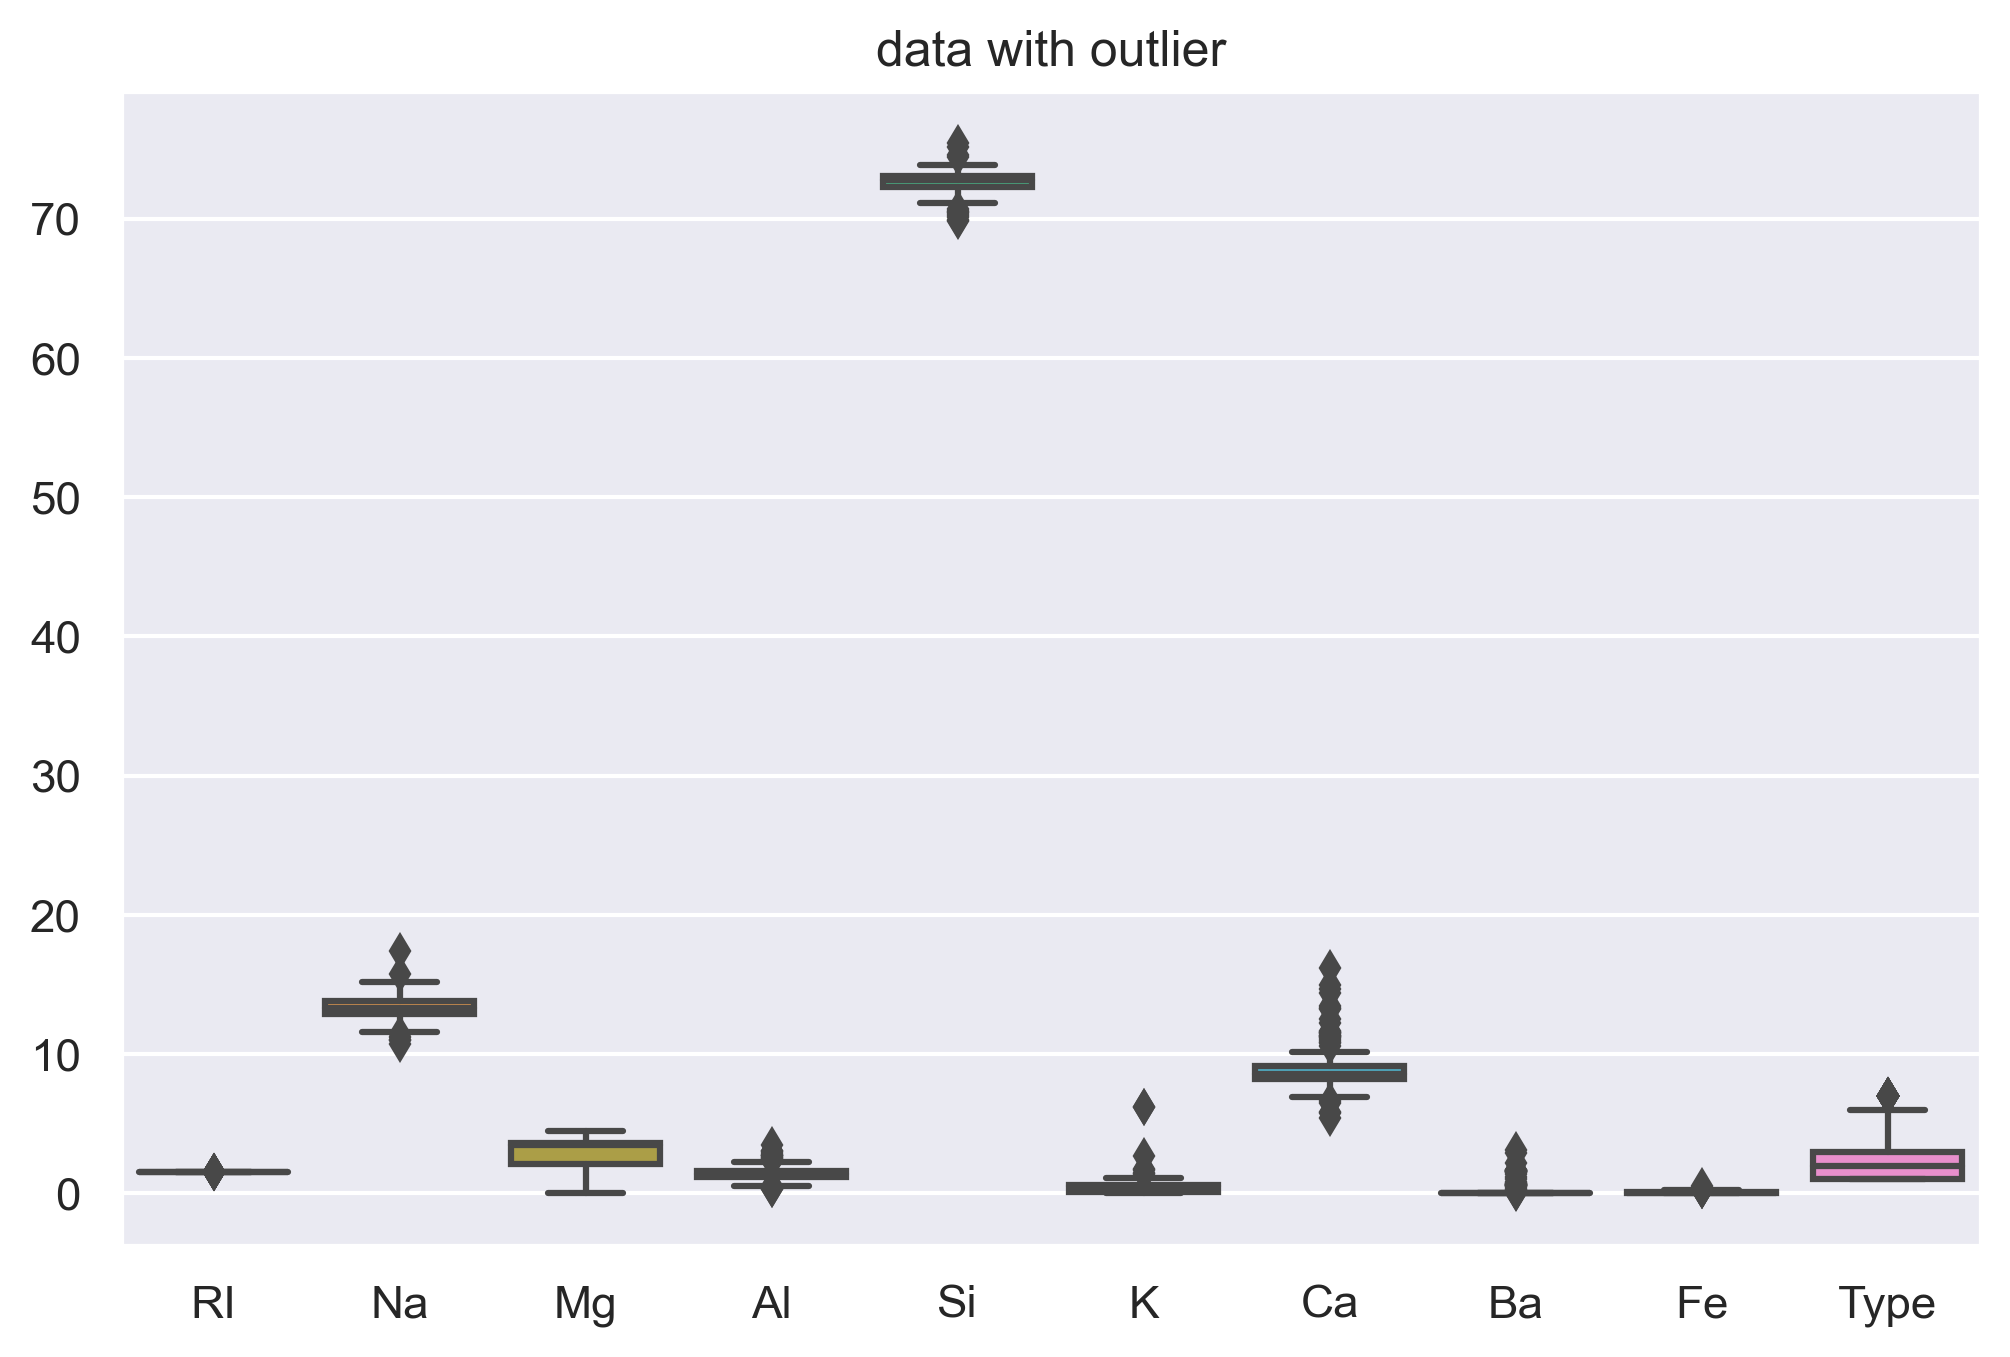

In [8]:
sns.boxplot(data = df)
plt.title('data with outlier')

In [9]:
# function to remove outlier
def outlier_remove(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df.loc[df[col]>upper,col] = upper
    df.loc[df[col]<lower,col] = lower

In [10]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [11]:
# removing outlier from the columns using above created fucntion 
outlier_remove(df = df,col = 'RI')
outlier_remove(df = df,col = 'Na')
outlier_remove(df = df,col = 'Mg')
outlier_remove(df = df,col = 'Al')
outlier_remove(df = df,col = 'Si')
outlier_remove(df = df,col = 'K')
outlier_remove(df = df,col = 'Ca')
outlier_remove(df = df,col = 'Ba')
outlier_remove(df = df,col = 'Fe')

Text(0.5, 1.0, 'Outlier Removed')

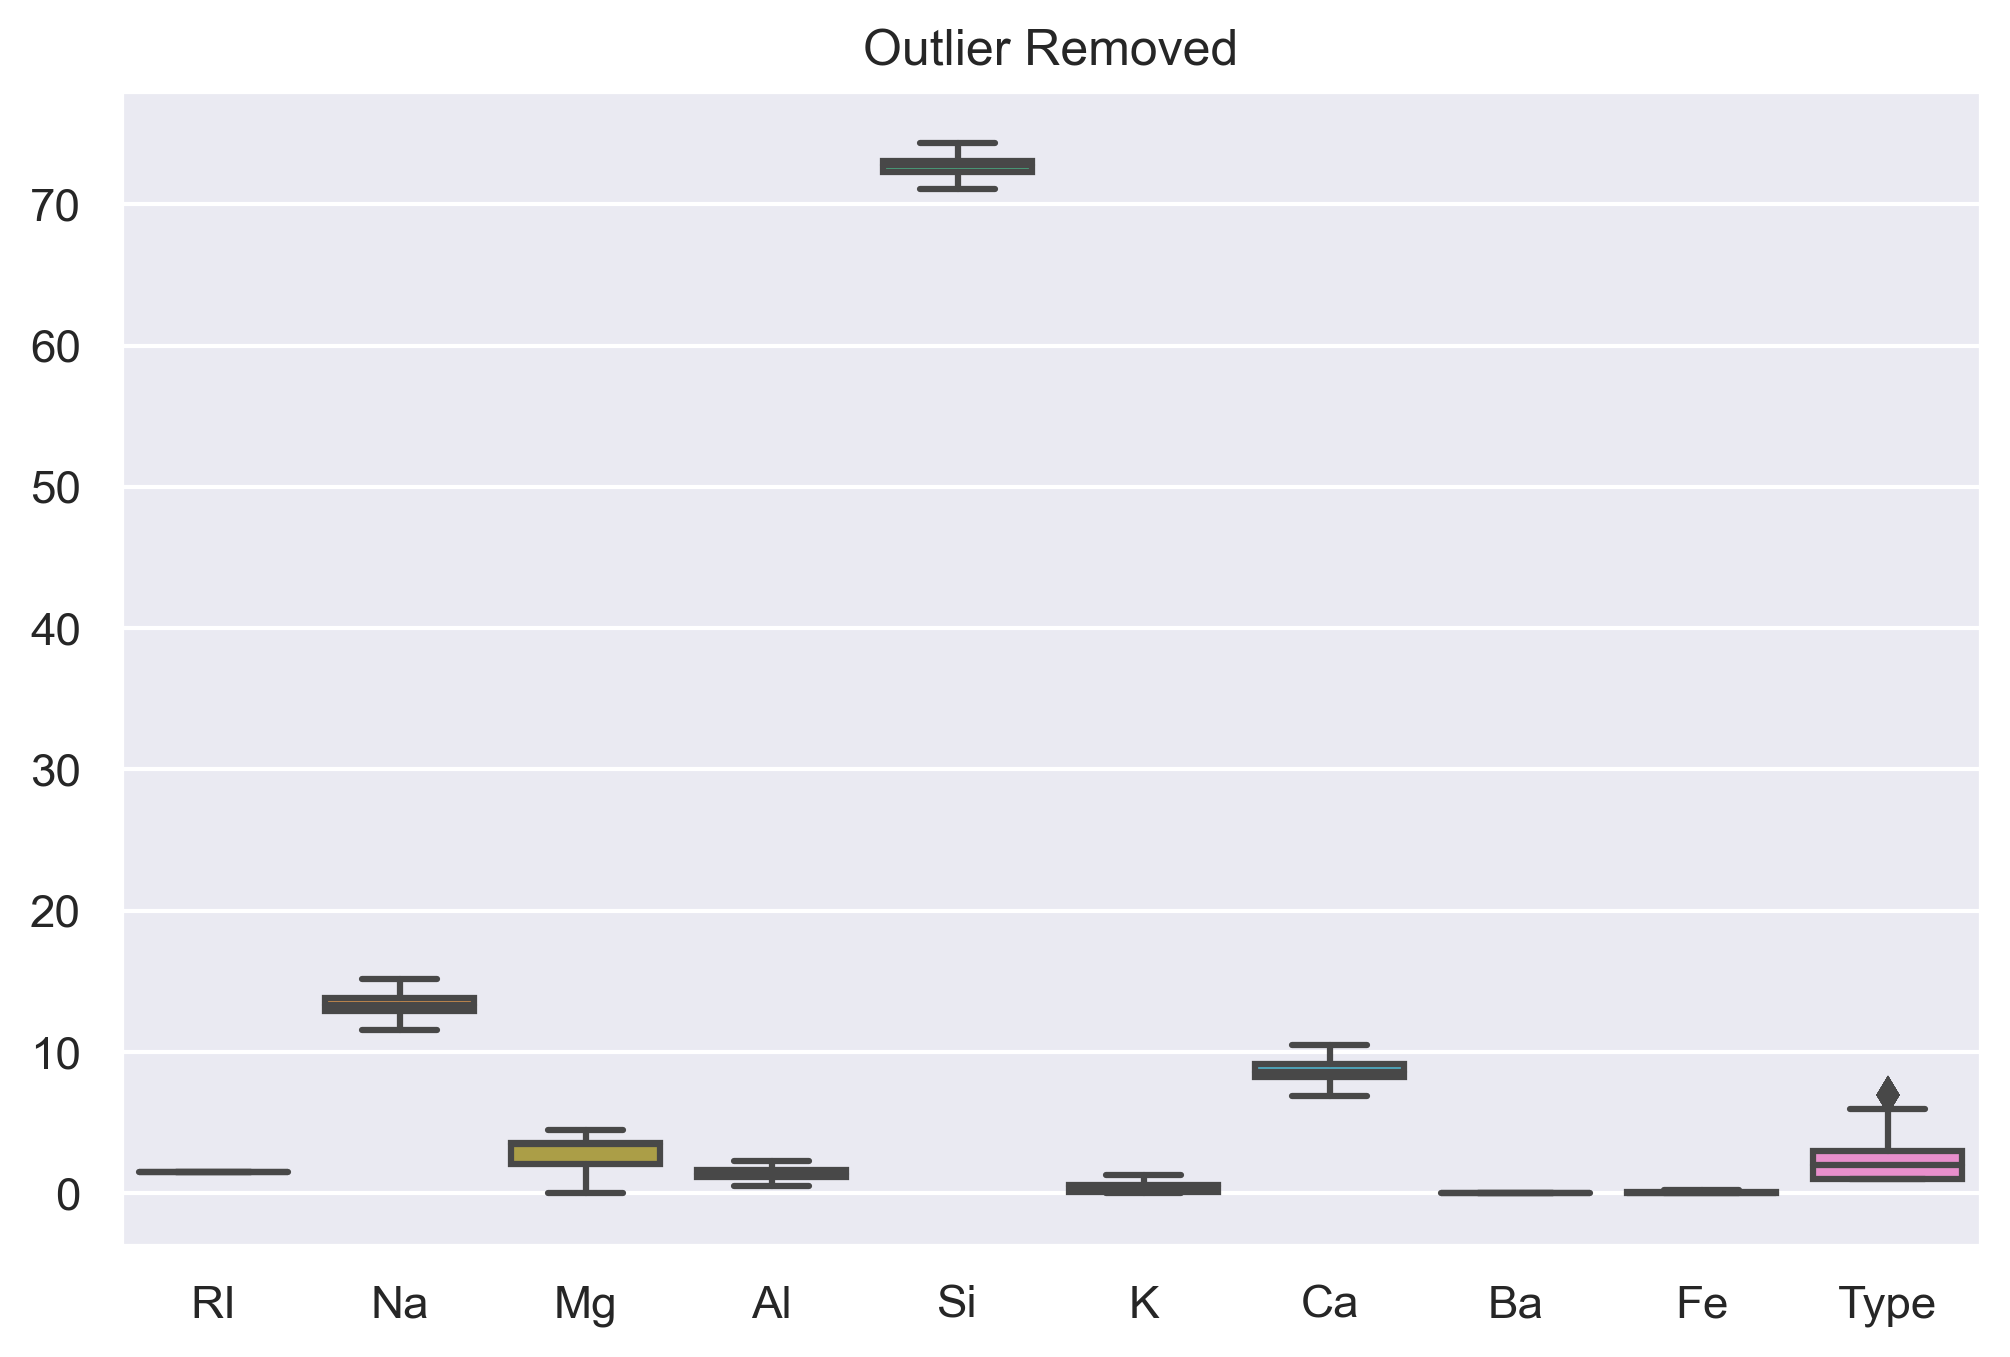

In [12]:
sns.boxplot(data = df)
plt.title('Outlier Removed')

## visualizations

Text(0.5, 1.0, 'count of all categories in target')

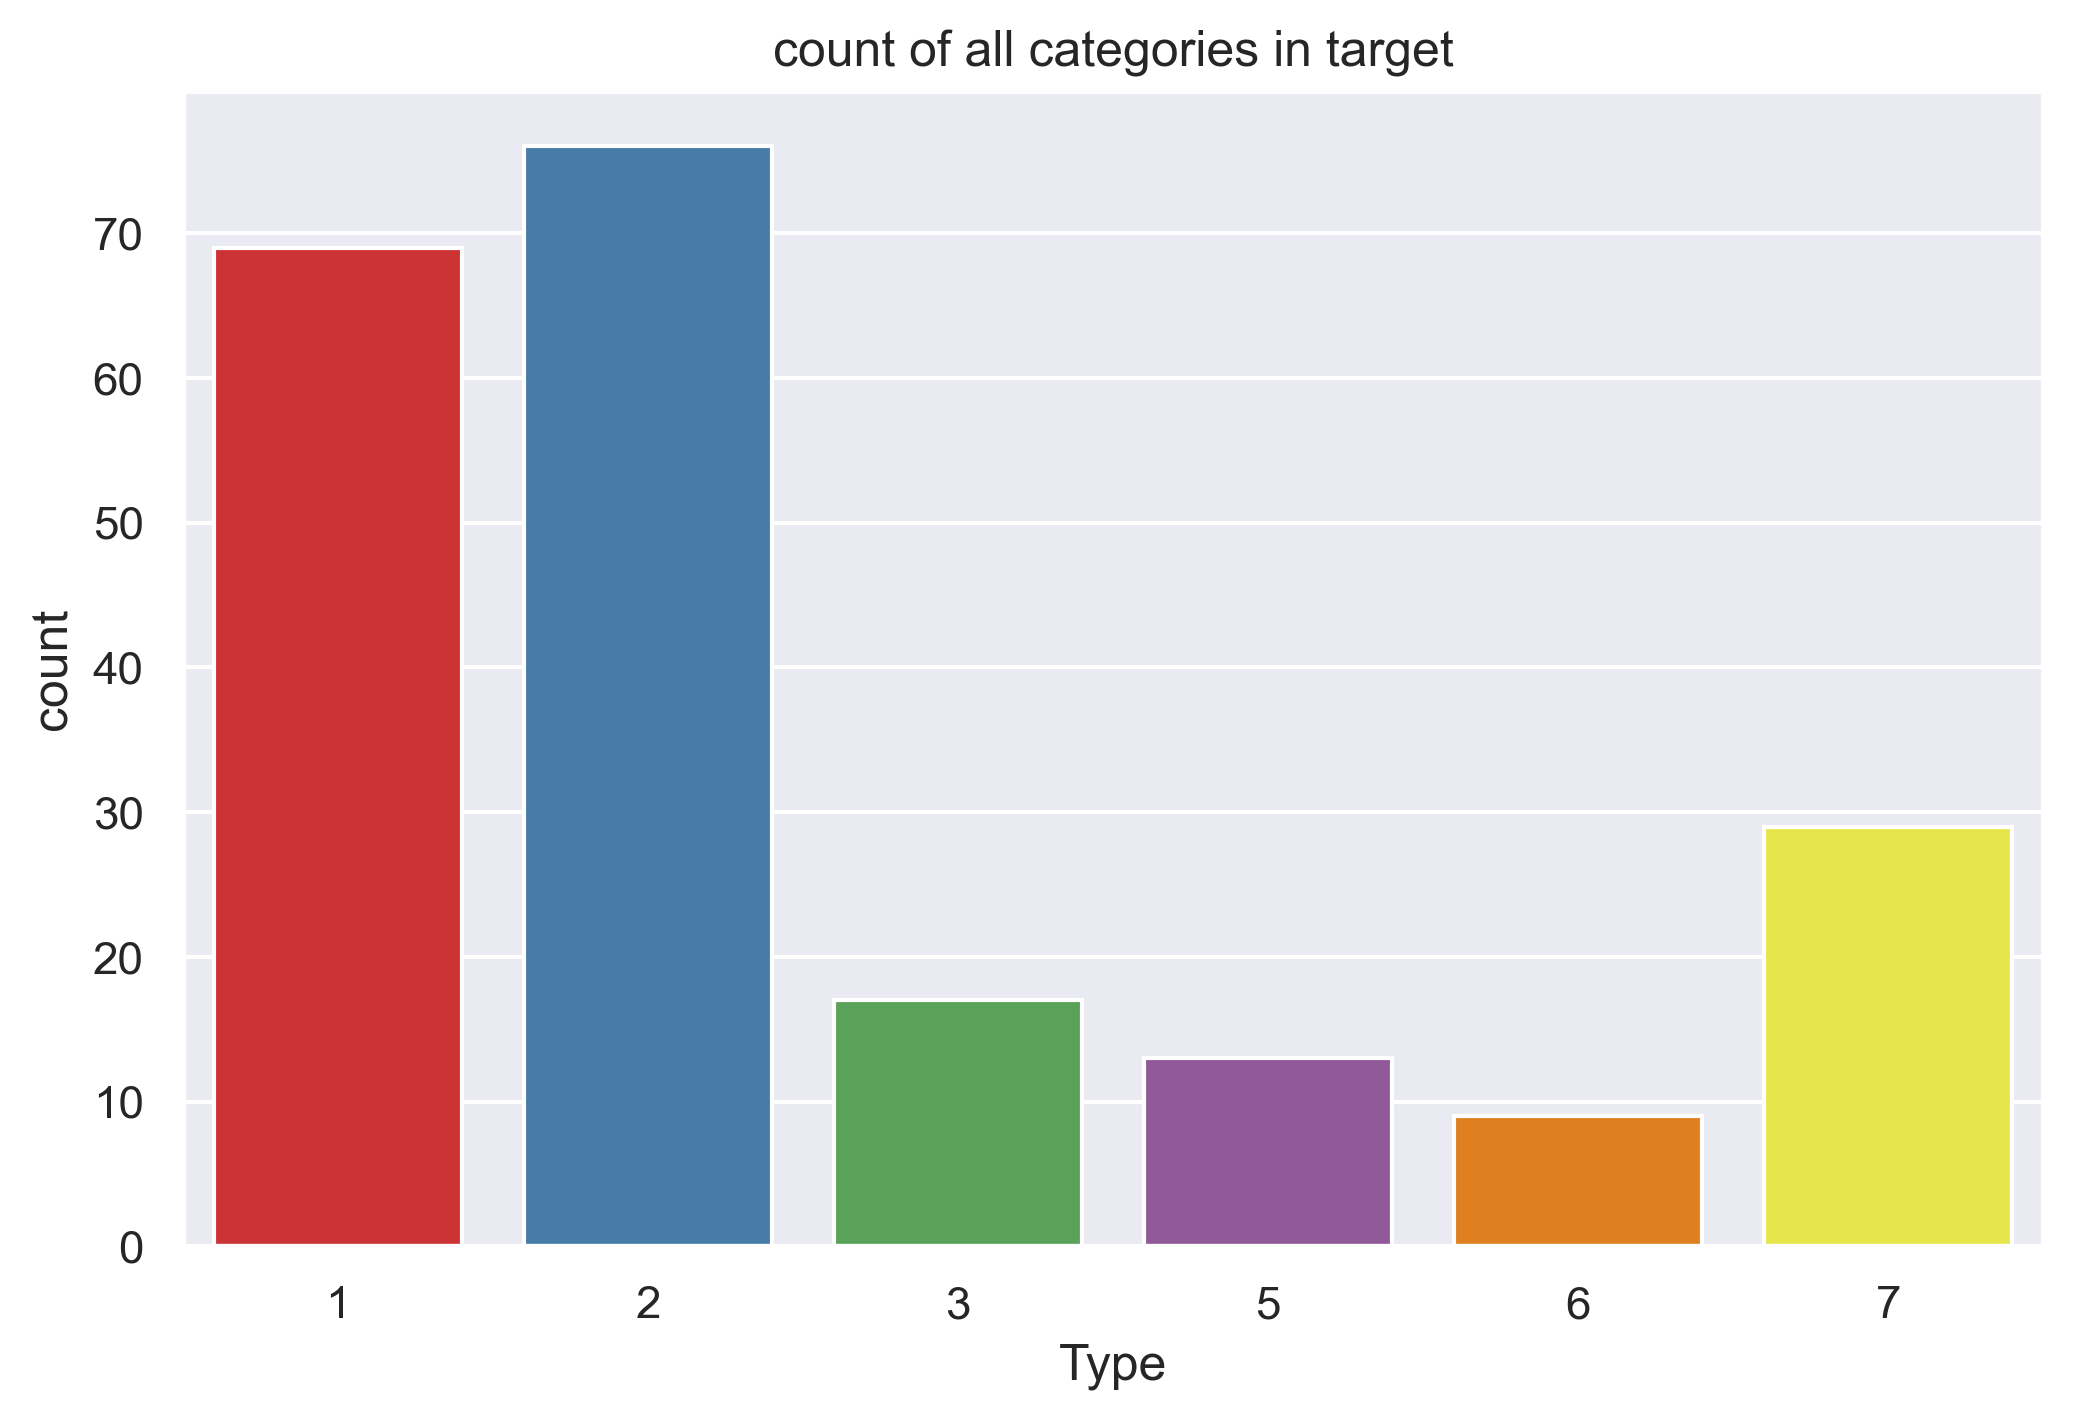

In [13]:
sns.countplot(data = df, x = 'Type')
plt.title('count of all categories in target')

<Axes: xlabel='Mg', ylabel='Al'>

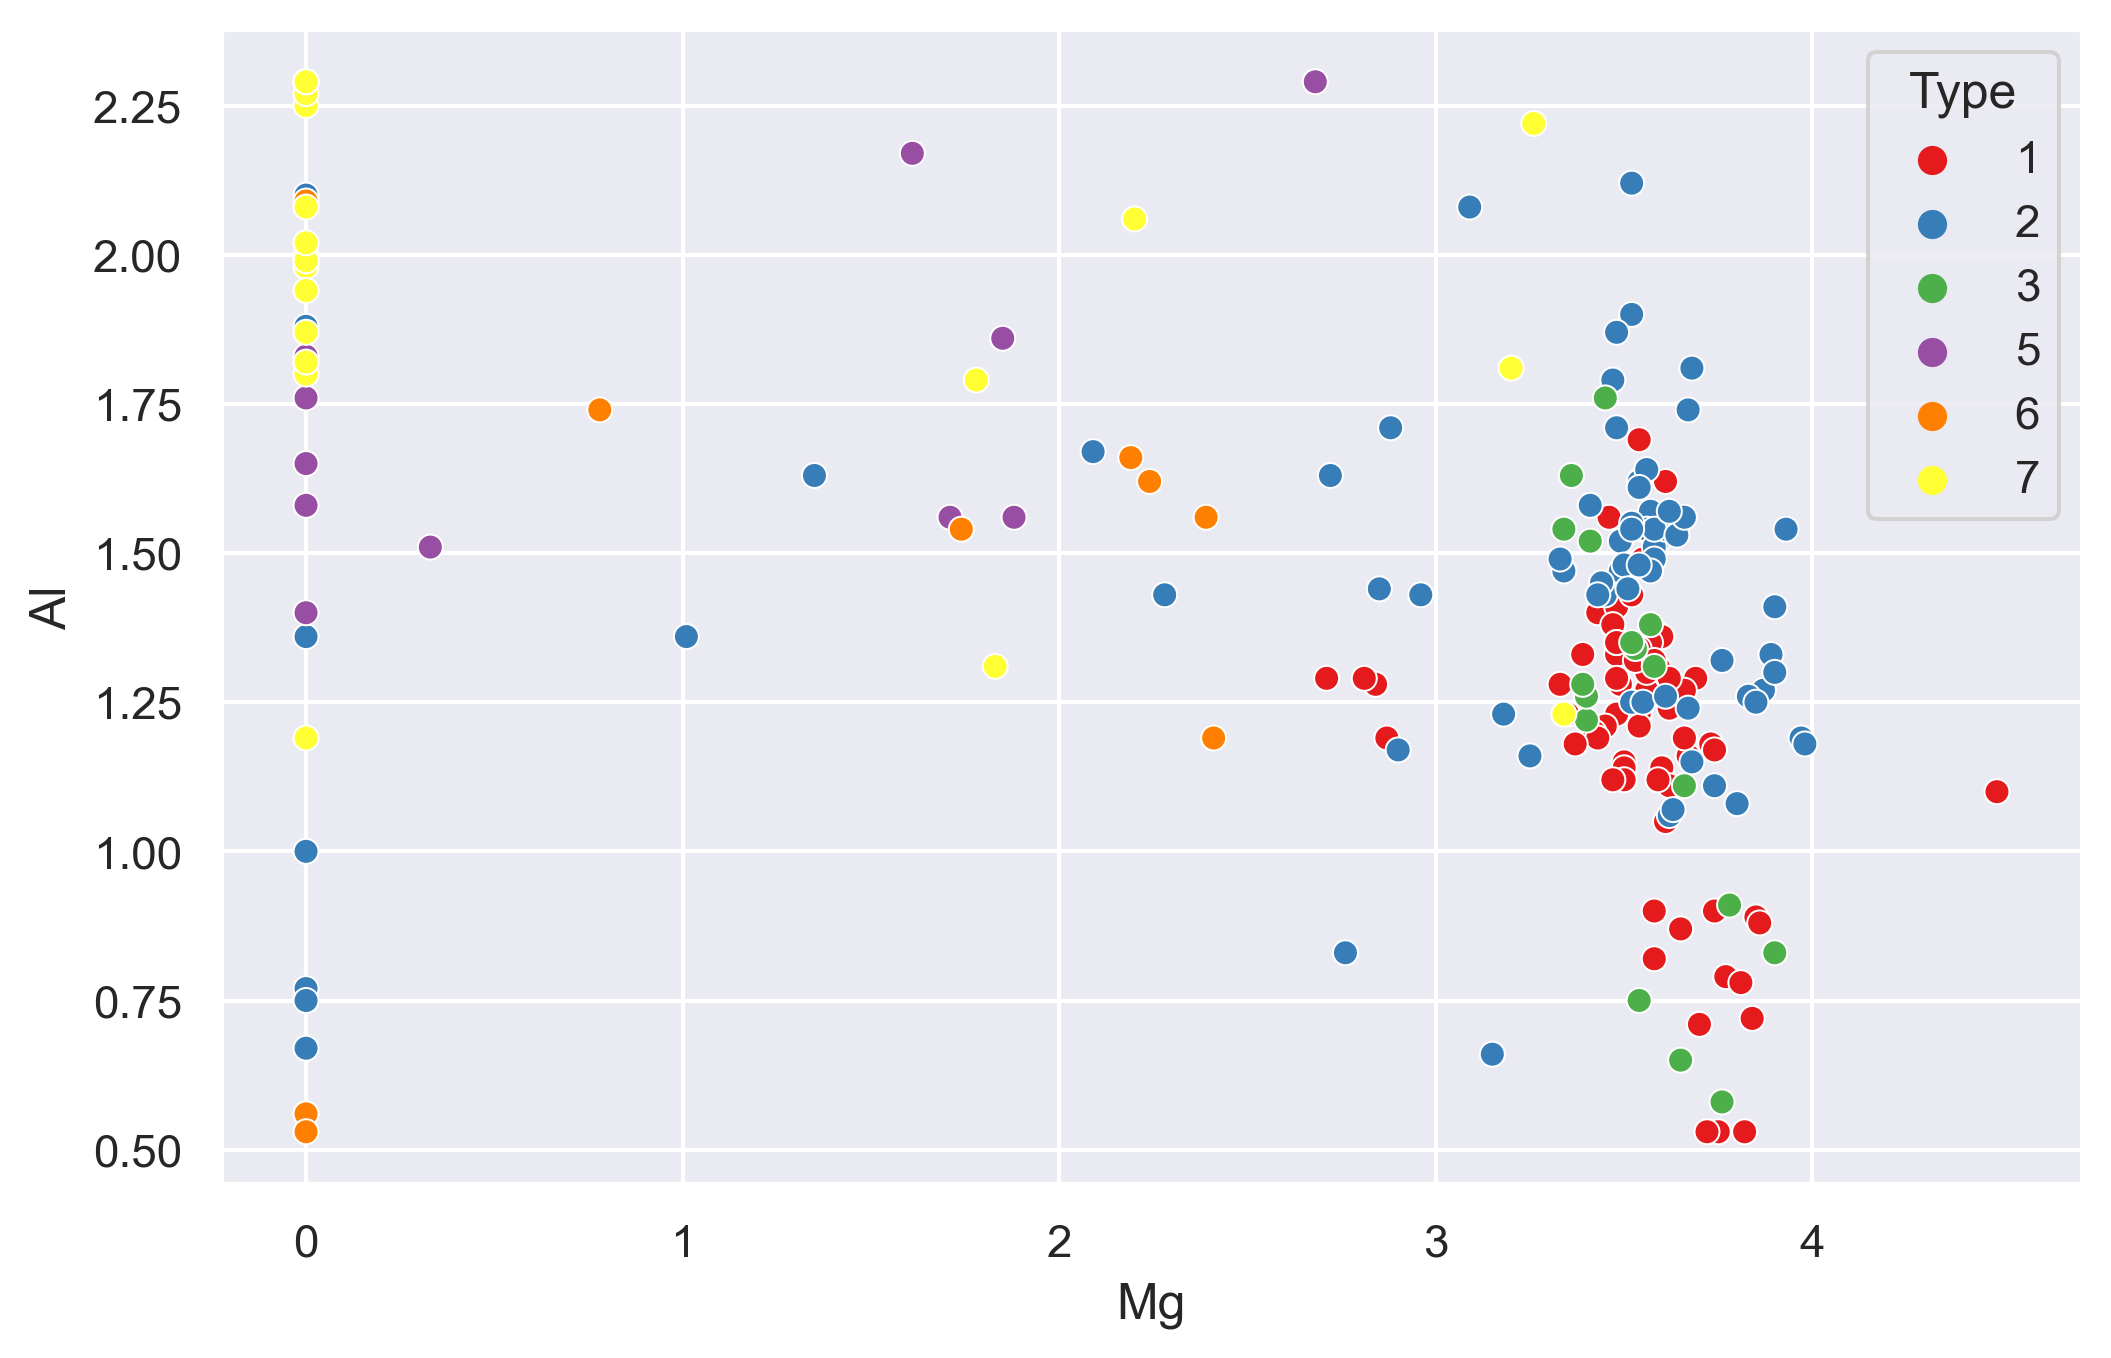

In [14]:
sns.scatterplot(data = df, x = 'Mg', y = 'Al',hue = 'Type', palette='Set1')

<Axes: xlabel='Ca', ylabel='Na'>

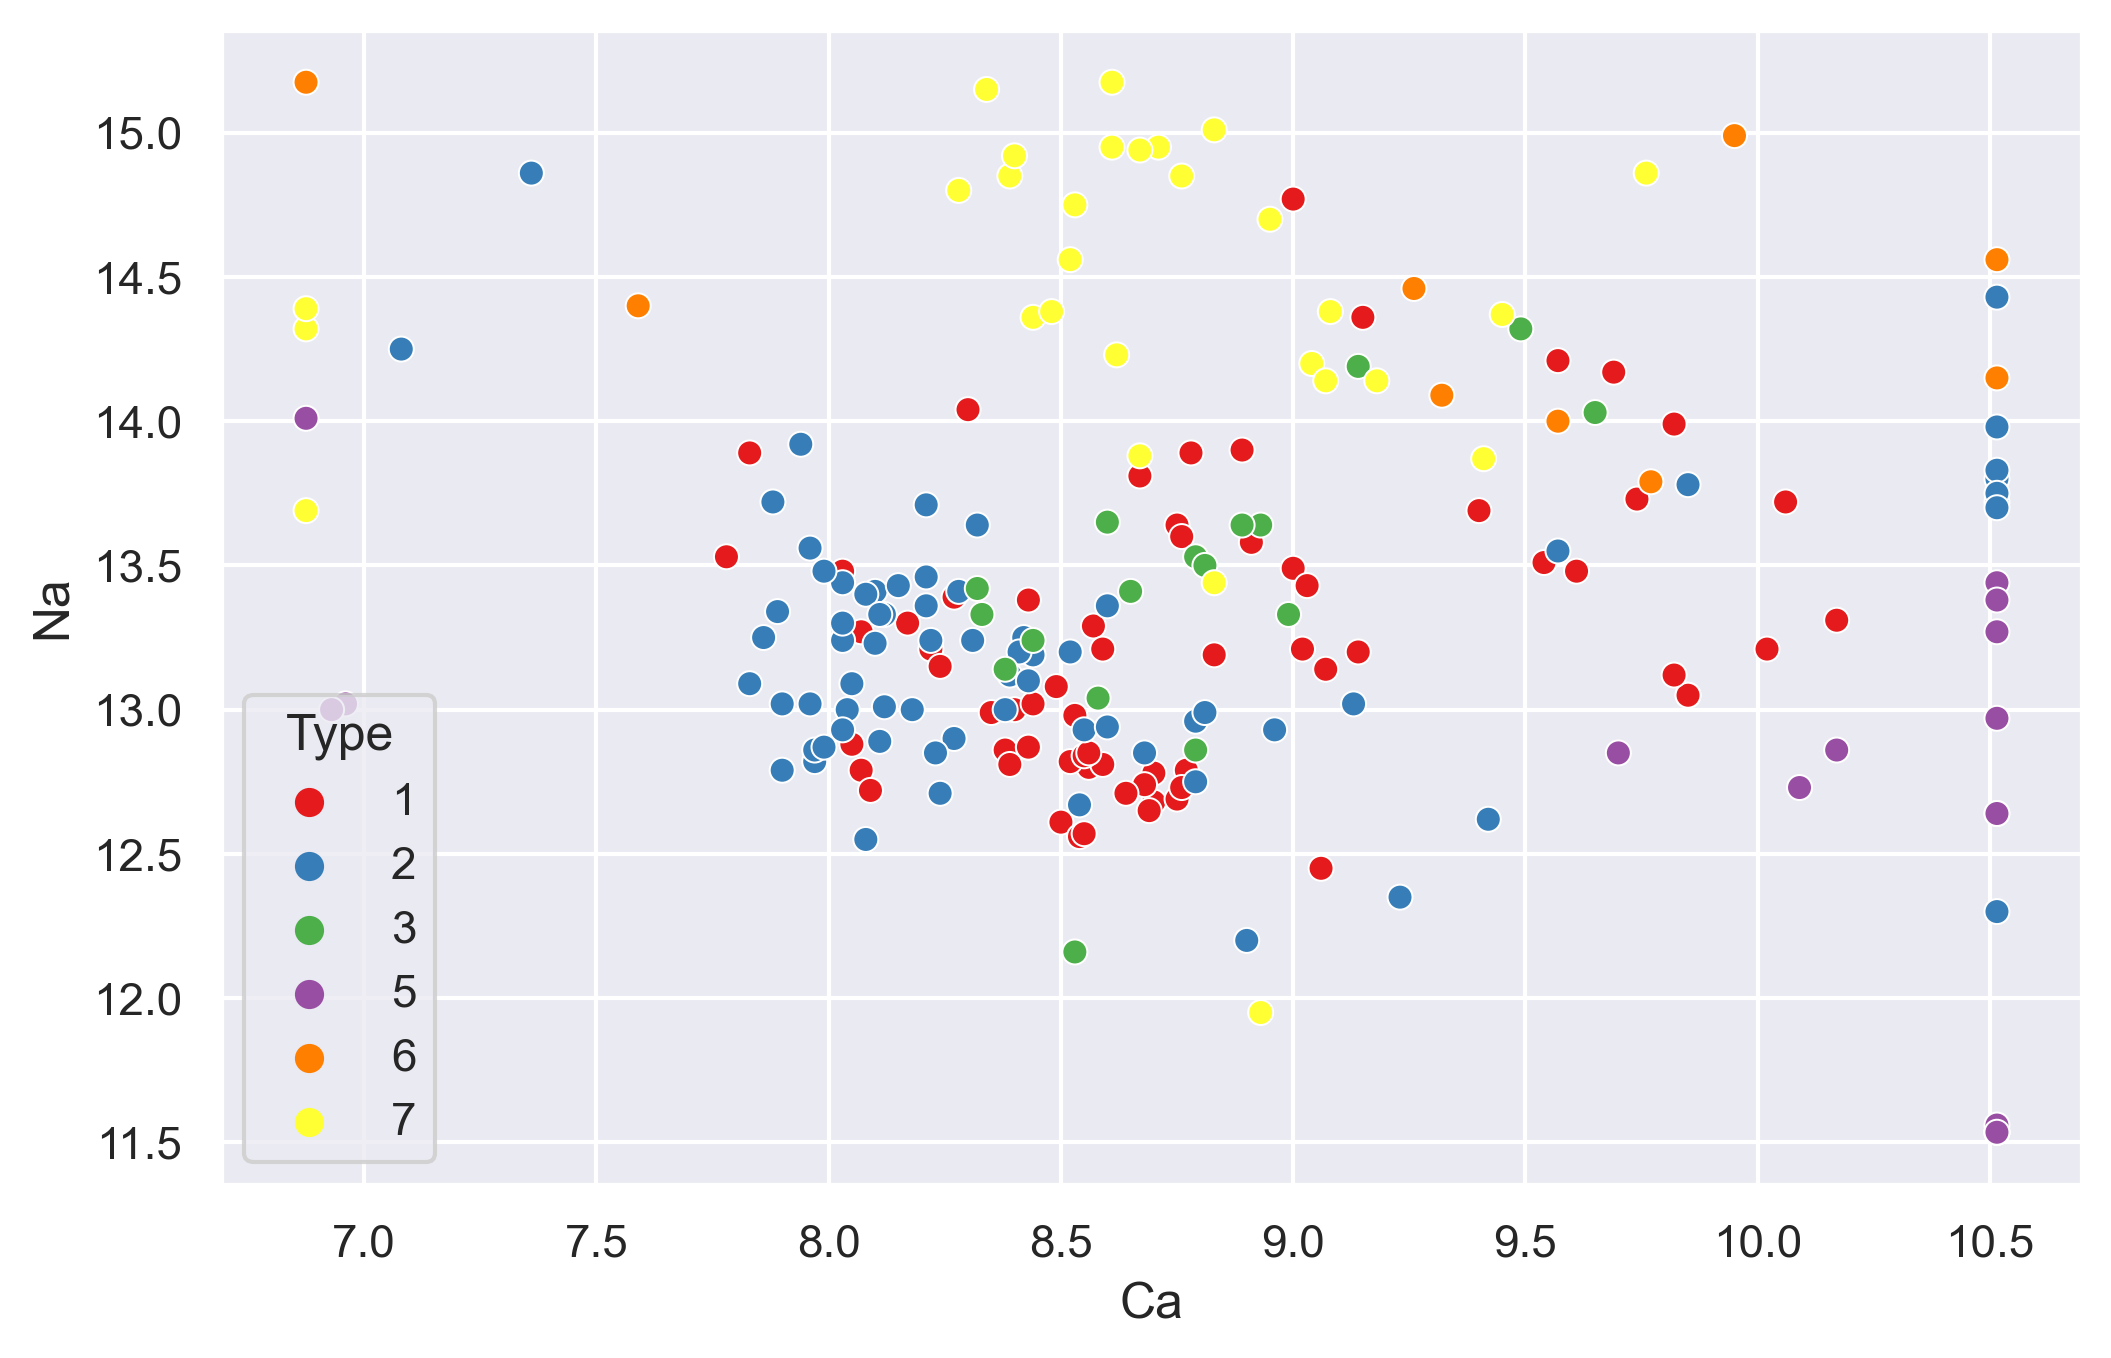

In [15]:
sns.scatterplot(data = df, x = 'Ca', y = 'Na',hue = 'Type', palette='Set1')

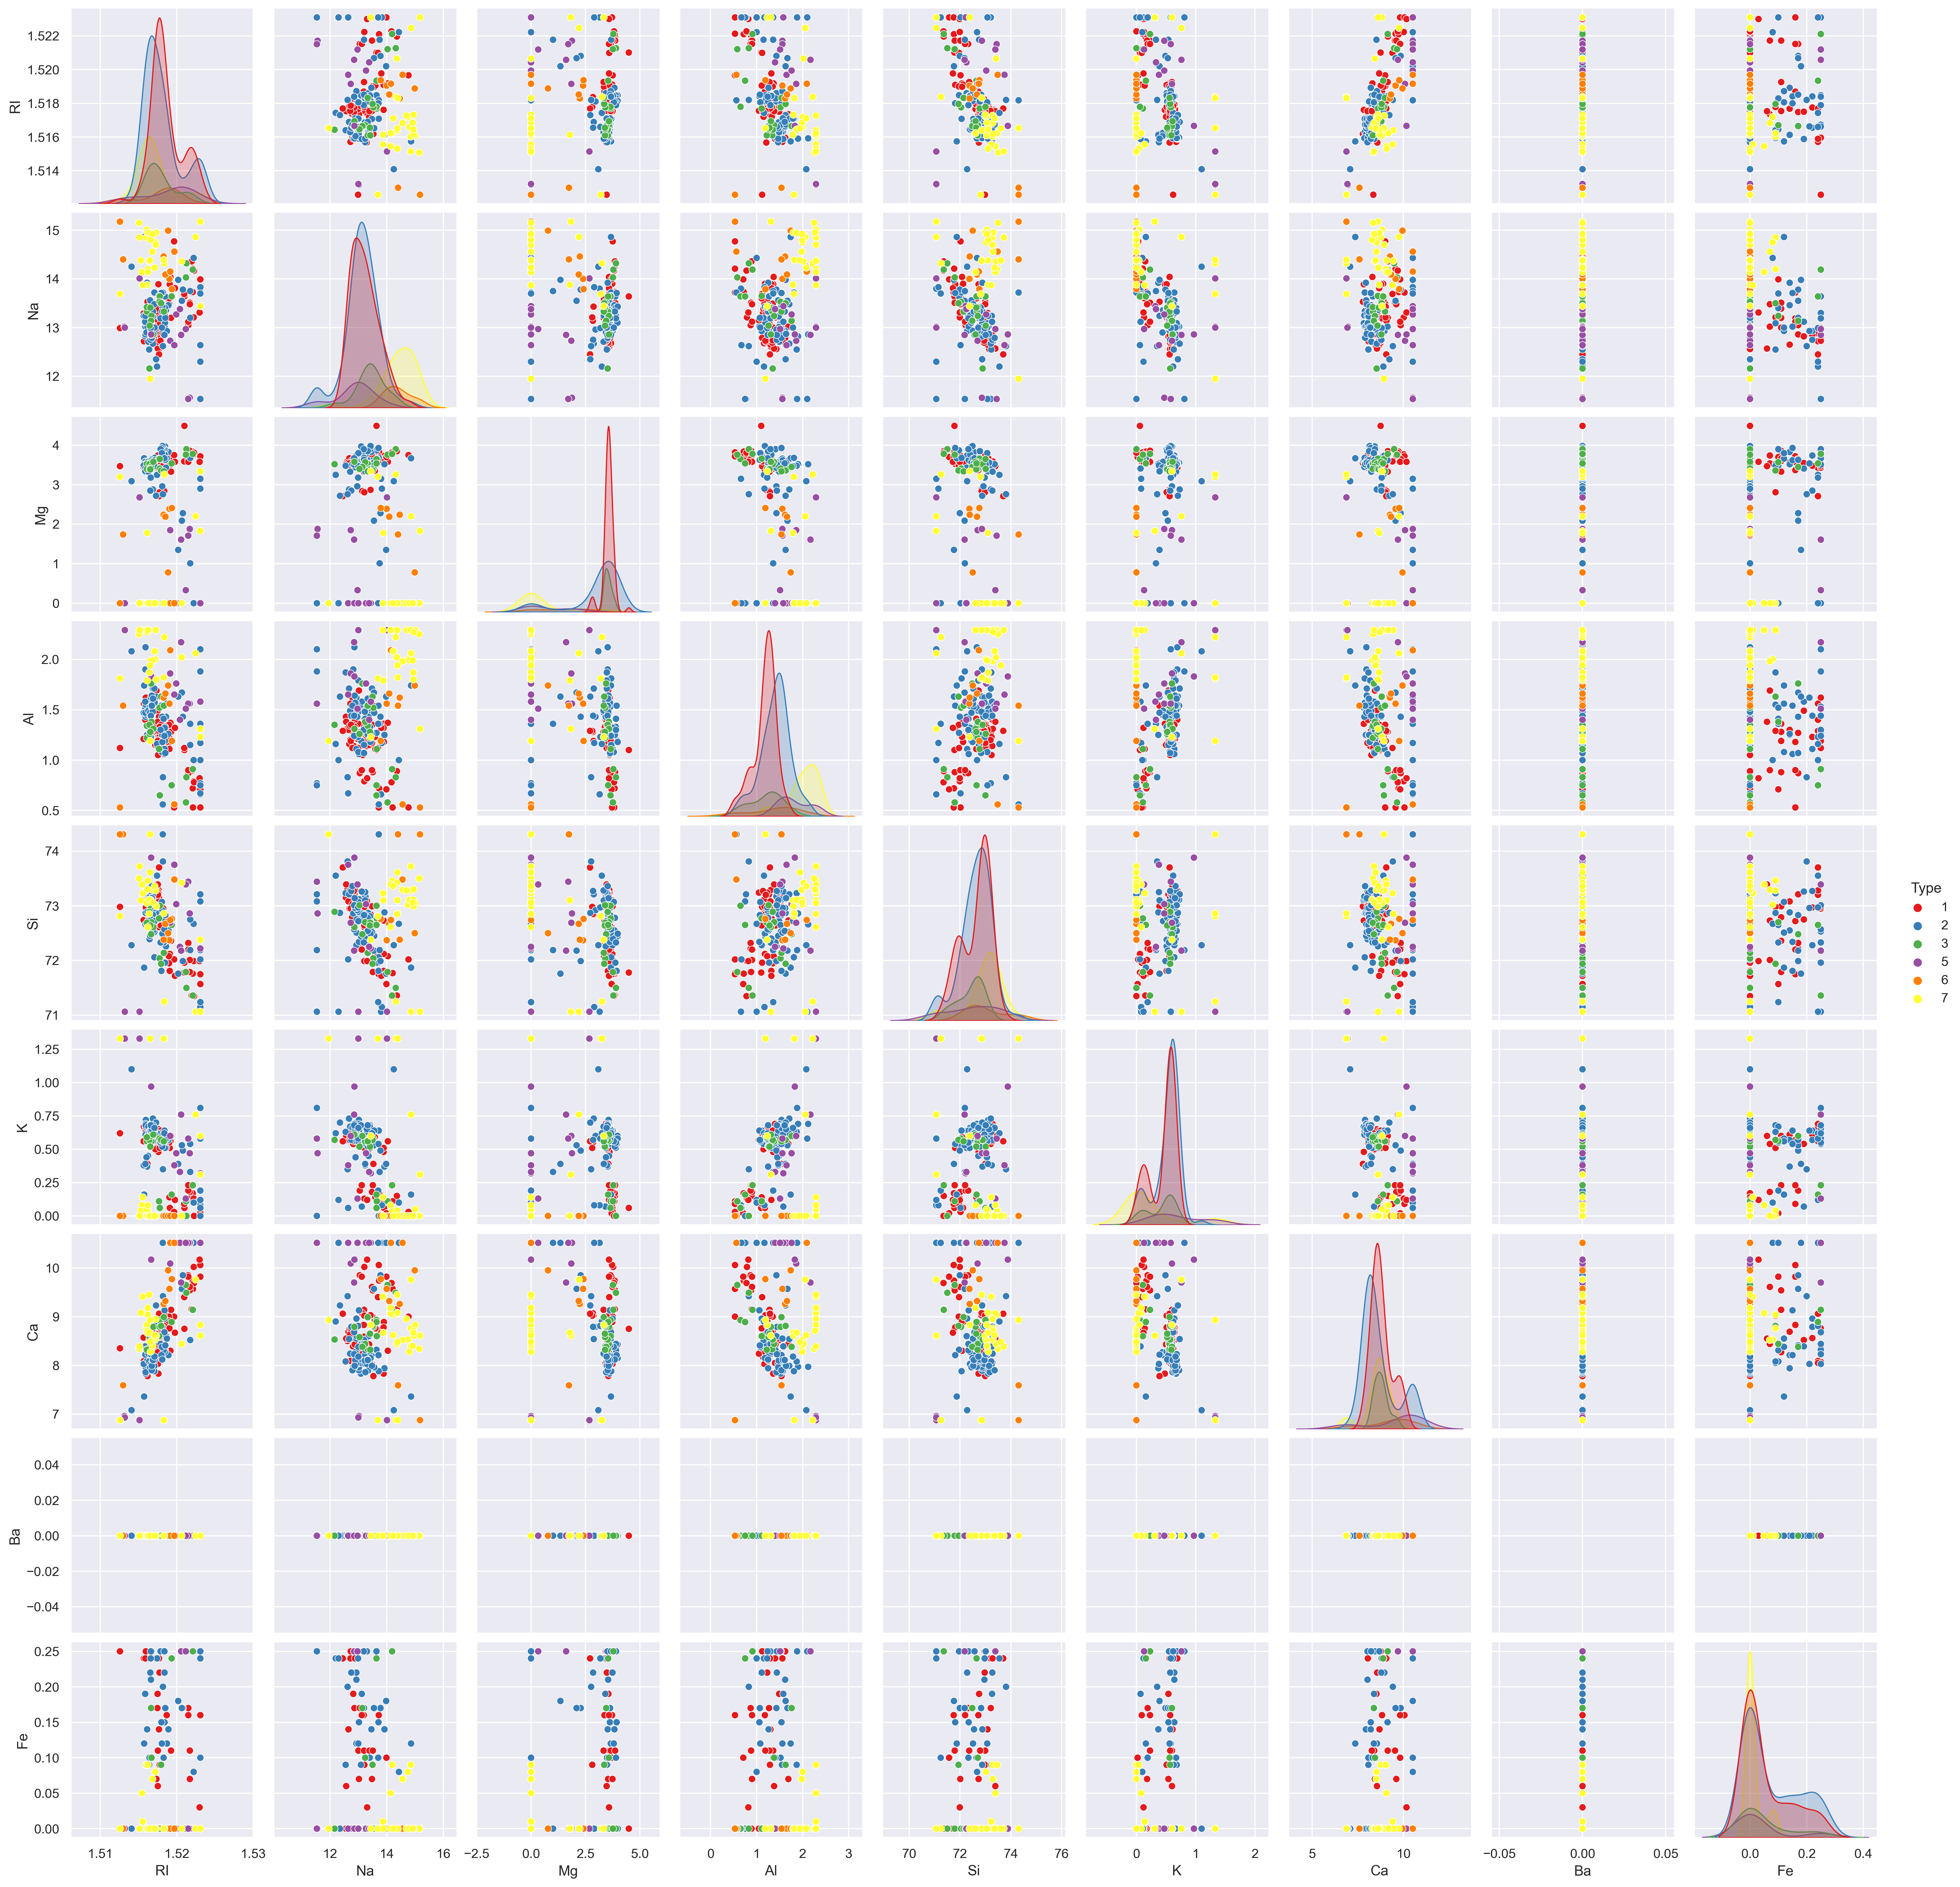

In [16]:
# pariplot
sns.pairplot(data = df, hue = 'Type', palette='Set1')

In [17]:
# splitting into features & target
x = df.drop('Type', axis = 1)
y = df['Type']

In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [19]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [20]:
len(x_train)

170

In [21]:
# standardizing the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x = sc.fit_transform(x)

**KNN model with default parameters**

In [22]:
base_model = KNeighborsClassifier()
base_model.fit(x_train,y_train)

KNeighborsClassifier()

In [23]:
# making predrictions test data
base_pred = base_model.predict(x_test)

In [24]:
confusion_matrix(y_test,base_pred)

array([[12,  5,  0,  0,  0,  0],
       [ 3,  8,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  3]], dtype=int64)

In [25]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           1       0.60      0.71      0.65        17
           2       0.47      0.73      0.57        11
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.60        43
   macro avg       0.68      0.61      0.62        43
weighted avg       0.57      0.60      0.57        43



**Elbow Method to find optimal value of K**

In [26]:
error_rate= []

for k in range (1,25):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_kpred = model.predict(x_test)
    test_error = 1 - accuracy_score(y_test,y_kpred)
    error_rate.append(test_error)

Text(0.5, 0, 'K Value')

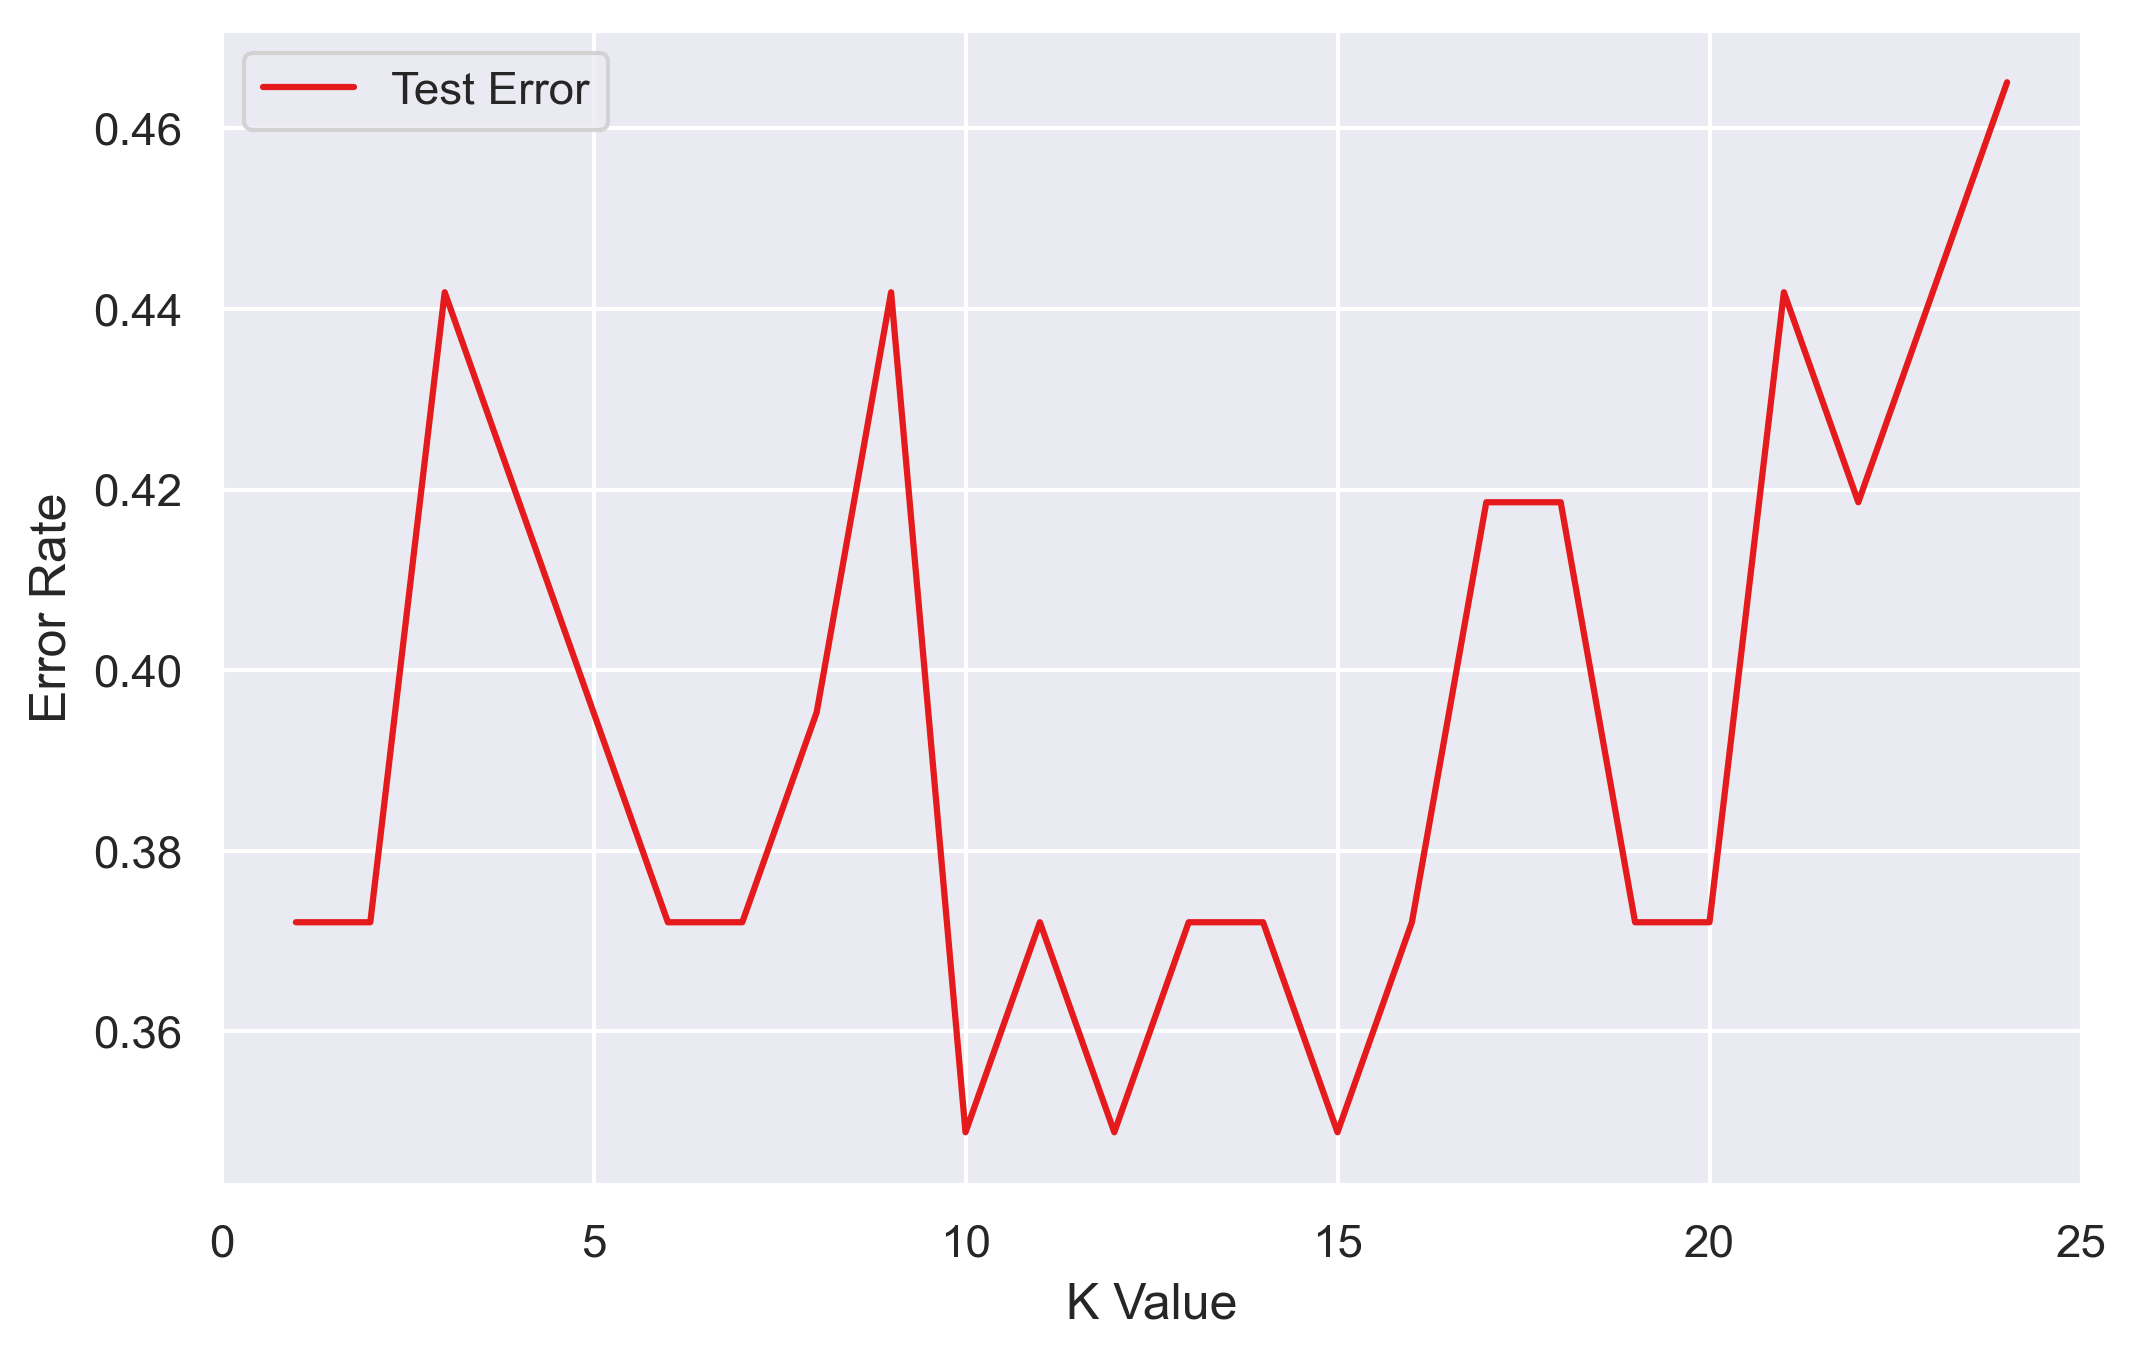

In [27]:
plt.plot(range(1,25),error_rate,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlim(0,25,1)
plt.xlabel("K Value")

**Error Ratw is lowest at k-value = 2**
- error rate is spiking due to presence of soo many categories

In [28]:
#  getting all the parameters with their default values

KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**finding best parameters using GriDsearchCV**

In [29]:
# creating a parameter Grid

param_grid = {"n_neighbors":range(1,25),"metric":['minkowski','euclidean']}

In [30]:
knn = KNeighborsClassifier()

In [31]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [32]:
# initilizing the gridsearch cv model

grid_model = GridSearchCV(estimator=knn,param_grid=param_grid, cv = 10)

#training the gridserch model on train data

grid_model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean'],
                         'n_neighbors': range(1, 25)})

In [33]:
# checking for best performing estimators

print(grid_model.best_estimator_)

# checking for best performing parameters

print(grid_model.best_params_)

KNeighborsClassifier(n_neighbors=2)
{'metric': 'minkowski', 'n_neighbors': 2}


In [34]:
# getting best score

grid_model.best_score_

0.7470588235294117

In [35]:
# predicting using best performing parameters

pred = grid_model.predict(x_test)

In [36]:
confusion_matrix(y_test, pred)

array([[16,  1,  0,  0,  0,  0],
       [ 5,  6,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  3]], dtype=int64)

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.62      0.94      0.74        17
           2       0.50      0.55      0.52        11
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         4
           6       0.00      0.00      0.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.63        43
   macro avg       0.52      0.46      0.46        43
weighted avg       0.56      0.63      0.57        43



**using cross validtion method to get best perfroming k vlaue based on avg accuracy score**

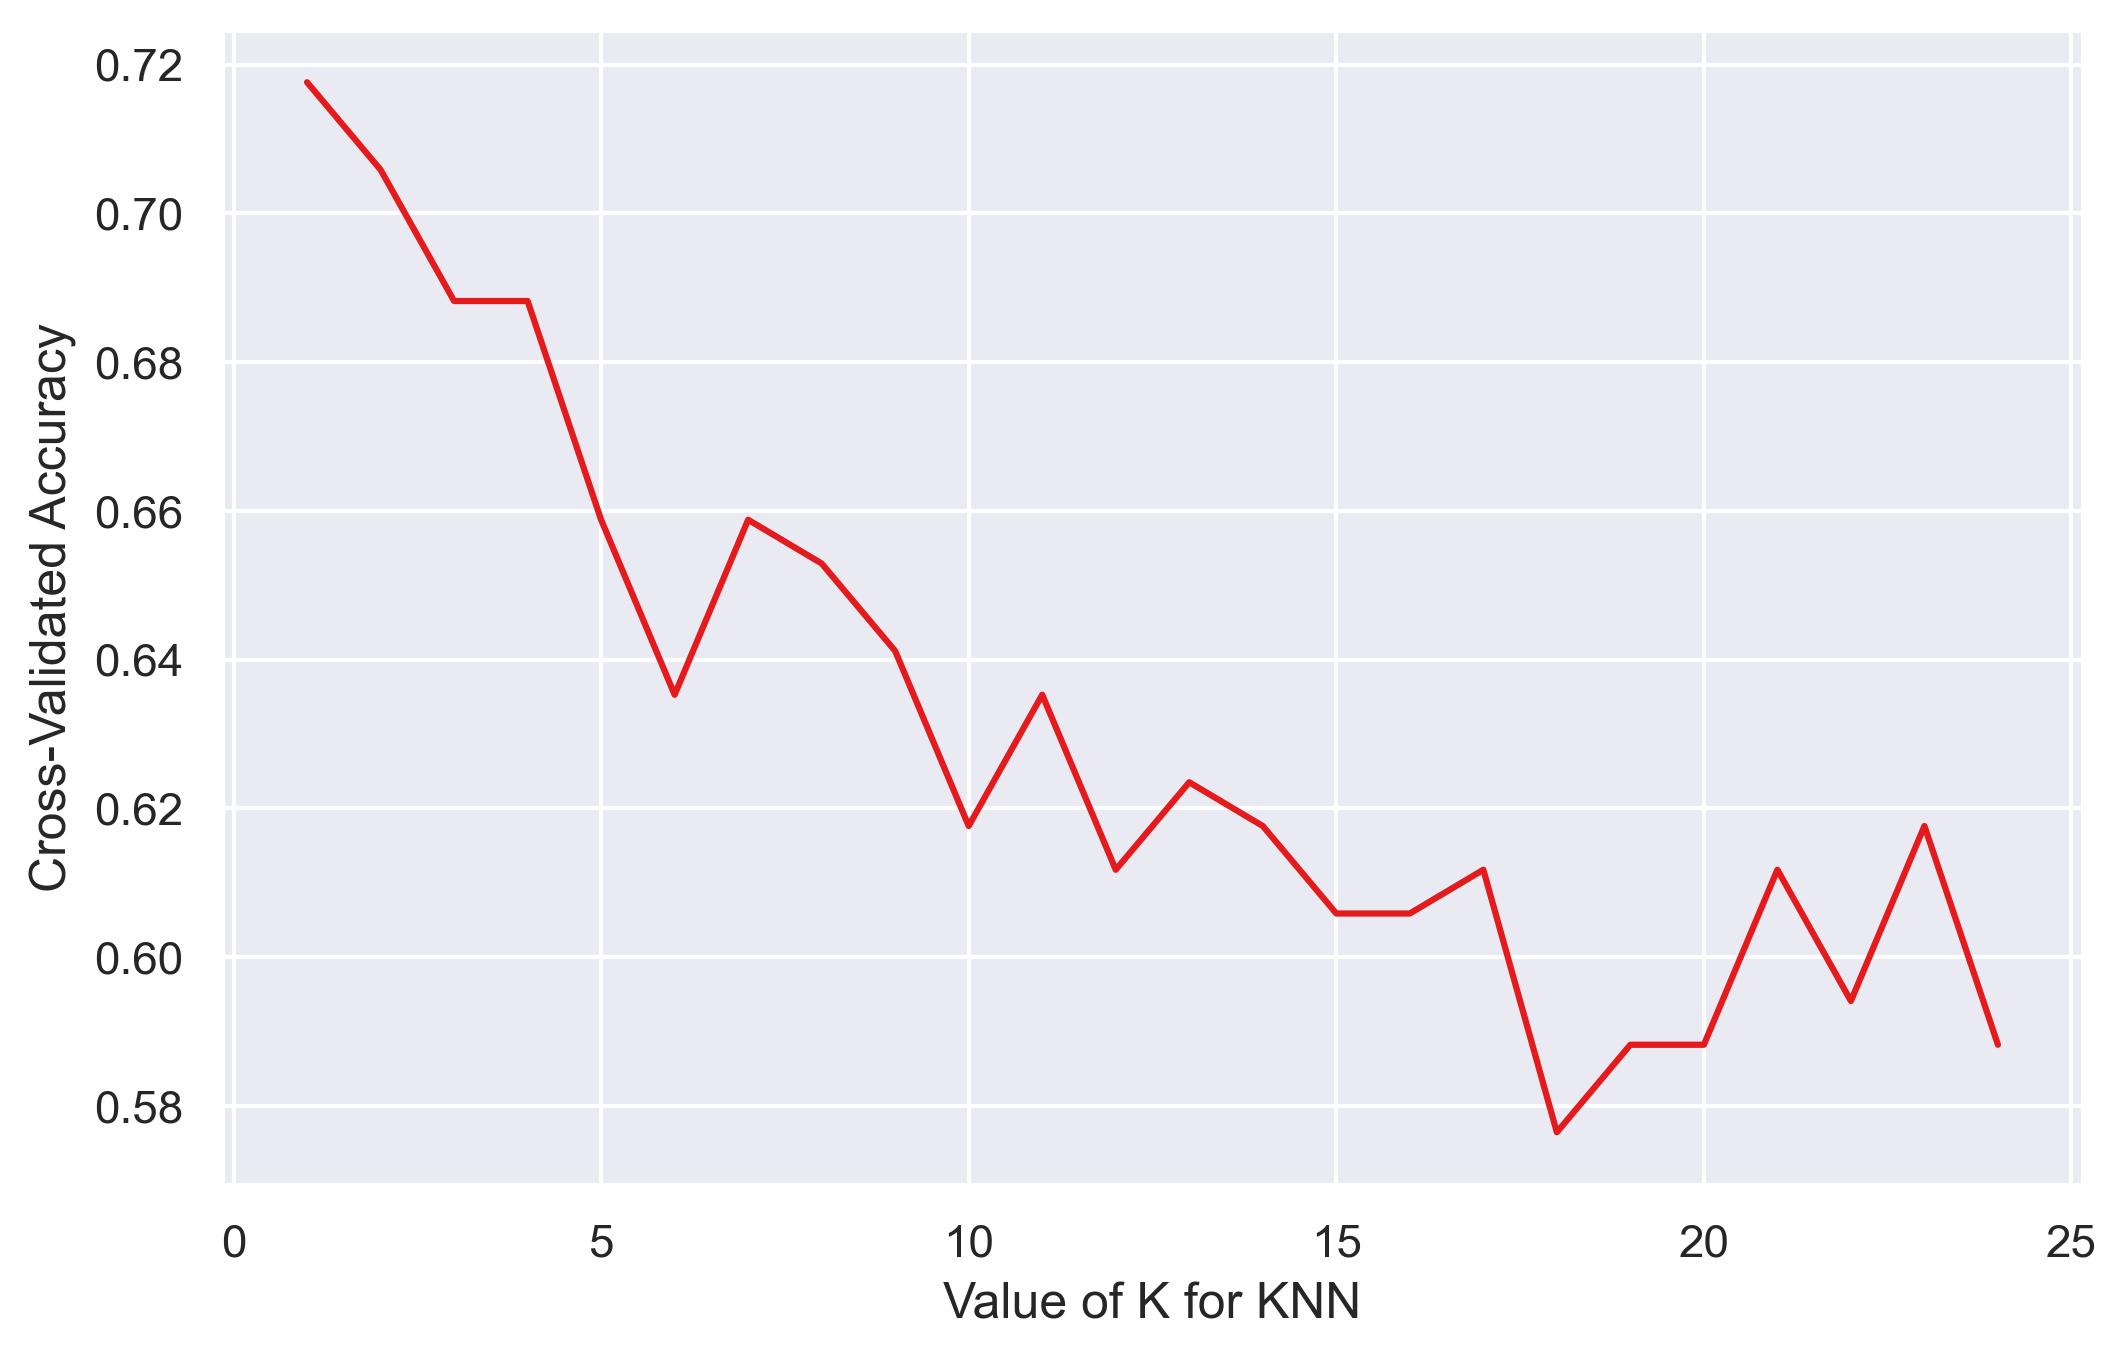

In [38]:
# choose k between 1 to 25

k_range = range(1, 25)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

**cross val accuracy is highest at k-value = 2**

In [39]:
# final model using k-vlaue = 2

final_model = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 2)
final_model.fit(x_train,y_train)
final_pred = final_model.predict(x_test)
print(confusion_matrix(y_test,final_pred))
print(classification_report(y_test,final_pred))

[[16  1  0  0  0  0]
 [ 5  6  0  0  0  0]
 [ 5  1  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  3]]
              precision    recall  f1-score   support

           1       0.62      0.94      0.74        17
           2       0.50      0.55      0.52        11
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         4
           6       0.00      0.00      0.00         1
           7       1.00      0.75      0.86         4

    accuracy                           0.63        43
   macro avg       0.52      0.46      0.46        43
weighted avg       0.56      0.63      0.57        43



**Training on complete dataset**

In [40]:
# training on complete dataset using k-vlaue = 2

final_model = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 2)
final_model.fit(x,y)
final_pred = final_model.predict(x)
print(confusion_matrix(y,final_pred))
print(classification_report(y,final_pred))

[[69  0  0  0  0  0]
 [13 63  0  0  0  0]
 [ 9  1  7  0  0  0]
 [ 0  5  0  8  0  0]
 [ 0  1  0  0  8  0]
 [ 1  3  0  2  1 22]]
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        69
           2       0.86      0.83      0.85        76
           3       1.00      0.41      0.58        17
           5       0.80      0.62      0.70        13
           6       0.89      0.89      0.89         9
           7       1.00      0.76      0.86        29

    accuracy                           0.83       213
   macro avg       0.88      0.75      0.79       213
weighted avg       0.85      0.83      0.82       213

